In [1]:
!pip install datasets torch==2.3.0 torchtext==0.18.0 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [1]:
from datasets import load_dataset

train_iter = load_dataset("sh0416/ag_news", split='train')

from sklearn.model_selection import StratifiedShuffleSplit

labels = [s['label'] - 1 for s in train_iter]

sss = StratifiedShuffleSplit(n_splits=1, train_size=0.95, random_state=42)
trix, valix = next(sss.split(labels, labels))

abc = set()
for t in train_iter:
  abc |= set(list(t['title']))
  abc |= set(list(t['description']))

abc = list(abc)

import numpy as np

def lzw(s: str, abc: list, d: dict = None, ret_dict: bool = False):
    d = d or {x: i for i, x in enumerate(abc)}
    k = len(d)
    x = s[0]
    ret = ""
    code_len = int(np.ceil(np.log2(k)))
    for i in range(1, len(s)):
        y = s[i]
        if x + y in d:
            x = x + y
            continue
        ret += bin(d[x])[2:].rjust(code_len, '0')
        d[x + y] = k
        k += 1
        code_len = int(np.ceil(np.log2(k)))
        x = y
    ret += bin(d[x])[2:].rjust(code_len, '0')

    if ret_dict:
        return ret, d
    return ret

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

train.jsonl:   0%|          | 0.00/33.7M [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/2.13M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [84]:
def count_characters_numpy(s, alphabet):
    alphabet = ''.join(alphabet)
    # Convert string and alphabet to numpy arrays of bytes
    s_array = np.frombuffer(s.encode(), dtype='S1')
    alphabet_array = np.frombuffer(alphabet.encode(), dtype='S1')

    # Initialize result array
    counts = np.zeros(len(alphabet), dtype=int)

    # Use broadcasting and comparison
    for i, char in enumerate(alphabet_array):
        counts[i] = np.sum(s_array == char)

    return counts

# Example usage
alphabet = 'abcde'
s = 'abacabad'
result = count_characters_numpy(s, alphabet)
print(result)  # Output: [4 2 1 1 0]

[4 2 1 1 0]


In [3]:
from scipy.special import xlogy

def entropy(prob: np.ndarray, base: float = np.e):
    return xlogy(-prob, prob).sum(axis=-1) / np.log(base)

def complexity_bound(s: np.ndarray, abc: list):
    l = len(abc)
    prob = s / s.sum()
    return (2 * l * np.log(len(s)) / np.log(l) + len(s) * entropy(prob, l)) * np.log2(l)

In [4]:
def kcd(s: np.ndarray, t: np.ndarray, cs, ct, abc: list):
    st = complexity_bound(s + t, abc)
    return max(max(st - cs, st - ct), 0)

In [5]:
def kc(freq, abc):
  return complexity_bound(freq, abc)

In [6]:
import torch
from itertools import combinations, cycle


class TextDatasetCorr(torch.utils.data.Dataset):
  def __init__(self, data_iter, index, Ncorr, Kcorr=2):
    super().__init__()

    p = np.random.permutation(len(index))
    self.labels = (np.array(data_iter[index]['label']) - 1)[p]
    self.texts = (np.array(data_iter[index]['title']) + ' ' + np.array(data_iter[index]['description']))[p]

    pools = tuple(cycle(self.texts[self.labels == l]) for l in range(self.labels.max() + 1))
    combs = combinations(range(len(pools)), Kcorr)
    res = []
    resy = []

    for ix in combs:
      for _ in range(Ncorr):
        sample_text = ' '.join([next(pools[i]) for i in ix])
        for i in ix:
          res.append(sample_text)
          resy.append(i)

    self.texts, self.labels = np.array(res), np.array(resy)
    self.frequencies = []
    for t in res:
      self.frequencies.append(count_characters_numpy(t, abc))
    self.frequencies = np.array(self.frequencies)
    # self.complexities = np.array([len(lzw(str(t), abc)) for t in self.texts])
    self.complexities = np.array([kc(f, abc) for f in self.frequencies])


  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    return self.texts[idx], self.labels[idx], self.complexities[idx], self.frequencies[idx]


class TextDataset(torch.utils.data.Dataset):
  def __init__(self, data_iter, index):
    super().__init__()
    self.labels = (np.array(data_iter[index]['label']) - 1)
    self.texts = (np.array(data_iter[index]['title']) + ' ' + np.array(data_iter[index]['description']))
    # self.complexities = np.array([len(lzw(str(t), abc)) for t in self.texts])
    self.frequencies = []
    for t in self.texts:
      self.frequencies.append(count_characters_numpy(t, abc))
    self.frequencies = np.array(self.frequencies)
    self.complexities = np.array([kc(f, abc) for f in self.frequencies])

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    return self.texts[idx], self.labels[idx], self.complexities[idx], self.frequencies[idx]

In [7]:
sss = StratifiedShuffleSplit(n_splits=1, train_size=0.05, random_state=42)
noncorr_trix, _ = next(sss.split(labels, labels))
train_dataset3 = TextDatasetCorr(train_iter, trix, 8000, 3)
train_dataset4 = TextDatasetCorr(train_iter, trix, 8000, 4)
train_dataset0 = TextDataset(train_iter, noncorr_trix)
train_dataset0.labels = np.concat([train_dataset0.labels, train_dataset3.labels, train_dataset4.labels])
train_dataset0.texts = np.concat([train_dataset0.texts, train_dataset3.texts, train_dataset4.texts])
train_dataset0.complexities = np.concat([train_dataset0.complexities, train_dataset3.complexities, train_dataset4.complexities])
train_dataset0.frequencies = np.concat([train_dataset0.frequencies, train_dataset3.frequencies, train_dataset4.frequencies])
val_dataset = TextDataset(train_iter, valix)

In [8]:
from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import vocab

tokenizer = get_tokenizer('basic_english')
counter = Counter()
for t in train_dataset0.texts:
    counter.update(tokenizer(t))
for t in val_dataset.texts:
    counter.update(tokenizer(t))
vocab = vocab(counter, min_freq=1)

text_pipeline = lambda x: [vocab[token] for token in tokenizer(x)]

/usr/local/lib/python3.11/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.11/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.11/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated

In [9]:
text_pipeline('here is an example')

[786, 255, 53, 13392]

In [10]:
from scipy.special import xlogy

def entropy(prob: np.ndarray, base: float = np.e):
    return xlogy(-prob, prob).sum(axis=-1) / np.log(base)

def complexity_bound(s: np.ndarray, abc: list):
    l = len(abc)
    prob = s / s.sum()
    return (2 * l * np.log(len(s)) / np.log(l) + len(s) * entropy(prob, l)) * np.log2(l)

In [11]:
def kcd(s: np.ndarray, t: np.ndarray, cs, ct, abc: list):
    st = complexity_bound(s + t, abc)
    return max(max(st - cs, st - ct), 0)

In [12]:
len(train_dataset0)

134000

In [13]:
subsample_ix = np.random.choice(len(train_dataset0), 5000, replace=False)
M = np.zeros((len(subsample_ix), len(subsample_ix)))
for i in range(len(subsample_ix)):
  if i % 250 == 0:
    print(i)
  for j in range(i + 1, len(subsample_ix)):
    M[i, j] = M[j, i] = kcd(train_dataset0.frequencies[i], train_dataset0.frequencies[j], train_dataset0.complexities[i], train_dataset0.complexities[j], abc)

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750


In [28]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import gaussian_kde

def metric_kde_from_distances(bandwidth):
    """
    Estimate density using a distance-based Gaussian KDE.

    Parameters:
    - bandwidth: kernel bandwidth (scalar)

    Returns:
    - density_fn: function to compute density at out-of-sample points
    """

    def kde_density(distances_to_anchors):
        # distances_to_anchors: (n_anchors,) array of distances from new point to anchor points
        kernels = np.exp(-0.5 * (distances_to_anchors / bandwidth) ** 2)
        return np.mean(kernels) / (bandwidth * np.sqrt(2 * np.pi))

    return kde_density

# ------------------------------
# Example usage
# ------------------------------

# Simulate 1D data for clarity
np.random.seed(42)
X_train = np.random.normal(loc=0, scale=1, size=(100, 1))

# Use Euclidean distance
D_train = cdist(X_train, X_train, metric='euclidean')

# Fit density estimator using distances
bandwidth = 0.5
kde_fn = metric_kde_from_distances(bandwidth)

# Now estimate density at a new point (e.g., x = 1.5)
x_new = np.array([[1.5]])
d_new = cdist(x_new, X_train, metric='euclidean')[0]

density_at_x_new = kde_fn(d_new)
print(f"Estimated density at x=1.5: {density_at_x_new:.4f}")

Estimated density at x=1.5: 0.1242


<Axes: >

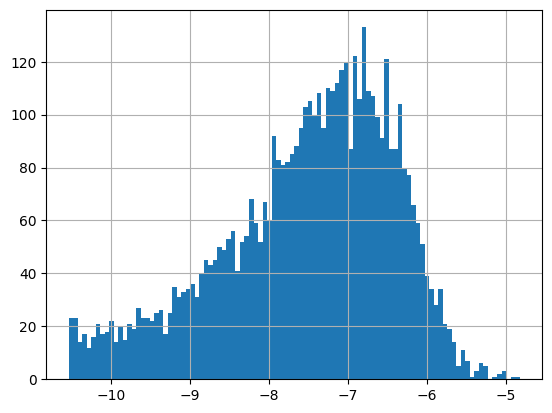

In [40]:
import pandas as pd

# Fit density estimator using distances
bandwidth = 3
kde_fn = metric_kde_from_distances(bandwidth)

scores = []
for i in range(M.shape[0]):
  # Now estimate density at a new point (e.g., x = 1.5)
  d_new = M[i].reshape(1, -1)
  density_at_x_new = np.log(kde_fn(d_new))
  scores.append(density_at_x_new)

pd.Series(scores).hist(bins=100)

In [53]:
from scipy.stats import kendalltau, pearsonr, linregress, spearmanr
for C in (kendalltau, pearsonr, linregress, spearmanr):
  print(C(scores, train_dataset0.complexities[subsample_ix]))

SignificanceResult(statistic=np.float64(-0.005875140149279503), pvalue=np.float64(0.5333305867358938))
PearsonRResult(statistic=np.float64(-0.004540770024330381), pvalue=np.float64(0.7482086457801623))
LinregressResult(slope=np.float64(-0.040026187676126715), intercept=np.float64(1418.5598519377363), rvalue=np.float64(-0.004540770024330381), pvalue=np.float64(0.7482086457801576), stderr=np.float64(0.12468439931519404), intercept_stderr=np.float64(0.9487002917737805))
SignificanceResult(statistic=np.float64(-0.008729984982055728), pvalue=np.float64(0.5371288179754643))


In [16]:
from sklearn.neighbors import NearestNeighbors

def mle(X: np.ndarray, k: int = 5, distances: bool = False):
    nn = NearestNeighbors(n_neighbors=k, metric='precomputed' if distances else 'minkowski').fit(X)
    dist, _ = nn.kneighbors()

    return (k - 1) / np.log(np.expand_dims(dist[:, -1], 1) / dist).sum(axis=-1)

def beta1(x: np.ndarray, y: np.ndarray) -> float:
    return np.sum(x*y) / np.square(x).sum()

def beta1_intercept(x: np.ndarray, y: np.ndarray) -> float:
    n = x.size
    return (np.sum(x*y) - n*x.mean()*y.mean()) / (np.sum(x*x) - n*x.mean()*x.mean())

def two_nn(X: np.ndarray, distances: bool = False):
    n = X.shape[0]
    nn = NearestNeighbors(n_neighbors=2, metric='precomputed' if distances else 'minkowski').fit(X)
    dist, _ = nn.kneighbors()
    return beta1(np.log(np.sort(dist[:, 1] / dist[:, 0])), -np.log(1 - np.linspace(0, 1 - 1 / n, n)))

def corr(X: np.ndarray):
    iu = np.triu_indices(X.shape[1], 1)
    d = np.copy(X[iu])
    d.sort()
    c = 2 * np.arange(1, d.shape[0] + 1) / (X.shape[0] - 1) / X.shape[0]
    return np.abs(beta1_intercept(np.log(d), np.log(c)))

In [42]:
def mle_aggregate(dim: np.ndarray):
    return 1 / np.mean(1 / dim)

<Axes: >

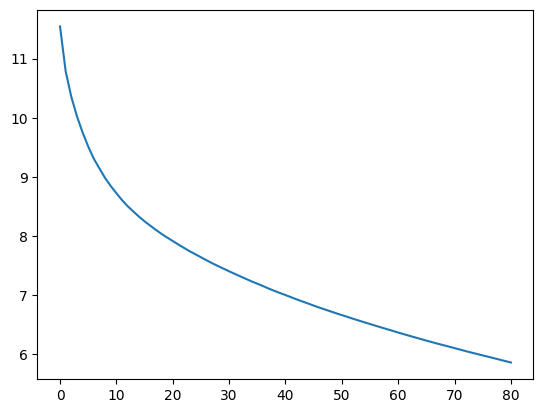

In [45]:
d = []
for x in range(10, 820, 10):
  d.append(mle_aggregate(mle(M, x, True)))
pd.Series(d).plot()

In [62]:
res = [list() for i in range(4)]
for x in range(10, 820, 10):
  dim = mle(M, x, True)
  for i, C in enumerate((kendalltau, pearsonr, spearmanr)):
    res[i].append(C(dim, train_dataset0.complexities[subsample_ix]).statistic)
  res[-1].append(linregress(dim, train_dataset0.complexities[subsample_ix]).rvalue)

TypeError: no numeric data to plot

<Axes: >

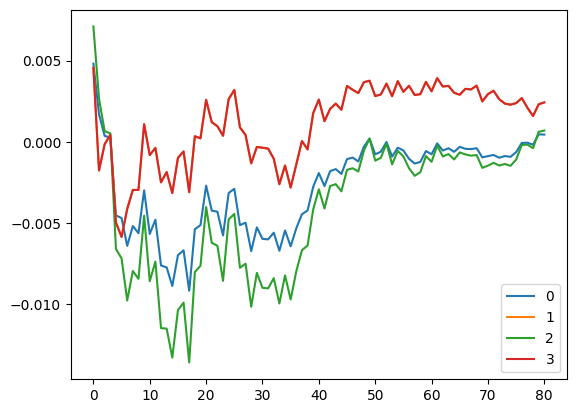

In [69]:
pd.DataFrame(res).T.plot()

In [46]:
corr(M)

np.float64(1.9805682001832488)

In [47]:
two_nn(M, True)

np.float64(8.787261674161165)

In [48]:
def mm(X: np.ndarray, k: int = 5, distances: bool = False):
    nn = NearestNeighbors(n_neighbors=k, metric='precomputed' if distances else 'minkowski').fit(X)
    dist, _ = nn.kneighbors()

    Tk = dist[:, -1]
    T = dist.mean(axis=1)
    return T / (Tk - T)

<Axes: >

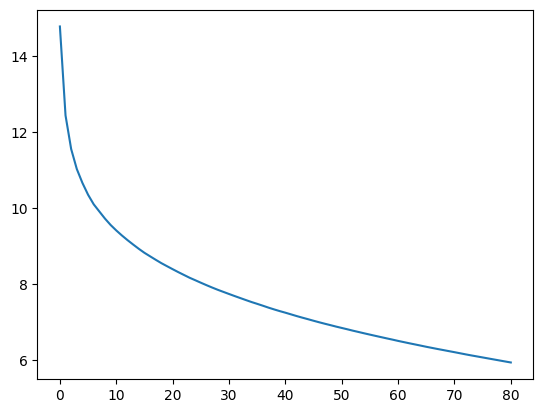

In [52]:
d = []
for x in range(10, 820, 10):
  d.append(mm(M, x, True).mean())
pd.Series(d).plot()

<Axes: >

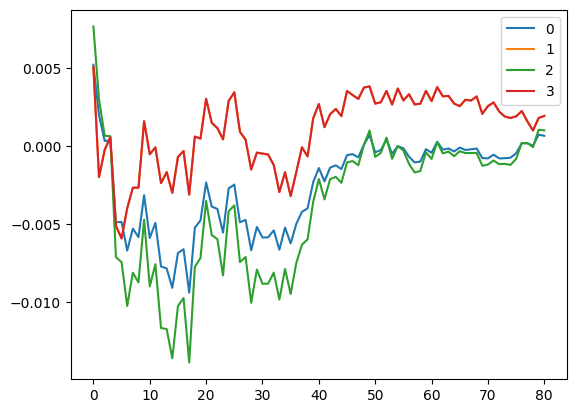

In [73]:
res = [list() for i in range(4)]
for x in range(10, 820, 10):
  dim = mm(M, x, True)
  for i, C in enumerate((kendalltau, pearsonr, spearmanr)):
    res[i].append(C(dim, train_dataset0.complexities[subsample_ix]).statistic)
  res[-1].append(linregress(dim, train_dataset0.complexities[subsample_ix]).rvalue)
pd.DataFrame(res).T.plot()

In [71]:
def ols(X: np.ndarray, k: int = 5, distances: bool = False):
    # Levina (in section 2)
    nn = NearestNeighbors(n_neighbors=k, metric='precomputed' if distances else 'minkowski').fit(X)
    dist, _ = nn.kneighbors()

    x = np.log(np.arange(1, k + 1))
    y = np.log(dist.mean(axis=0))

    return beta1_intercept(x, y)

<Axes: >

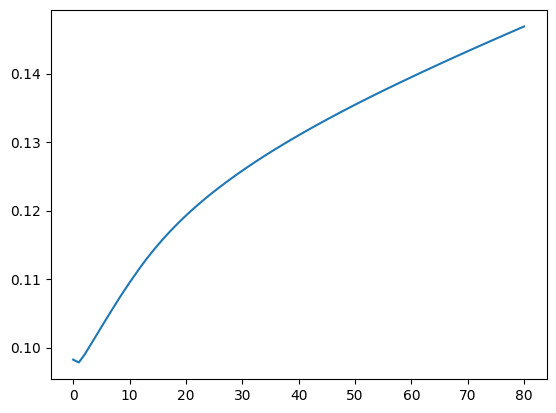

In [72]:
d = []
for x in range(10, 820, 10):
  d.append(ols(M, x, True))
pd.Series(d).plot()

In [76]:
X = np.stack([
    mle(M, 100, True),
    mm(M, 100, True),
    mle(M, 100, True),
    scores
], axis=-1)
y = train_dataset0.complexities[subsample_ix]

In [77]:
X.shape

(5000, 4)

In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Define models to compare
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

# 5. Train, predict, and assess models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })

# 6. Show results
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print(results_df)

              Model        MAE         MSE       RMSE        R²
2             Lasso   7.479109   94.562083   9.724304 -0.000010
1             Ridge   7.493271   94.812157   9.737153 -0.002655
0  LinearRegression   7.495396   94.869296   9.740087 -0.003259
6               SVR   7.456155   95.213743   9.757753 -0.006902
5  GradientBoosting   7.565357   96.716530   9.834456 -0.022794
4      RandomForest   8.008536  107.570399  10.371615 -0.137576
7               KNN   8.142266  111.799244  10.573516 -0.182296
3      DecisionTree  11.295977  208.719119  14.447115 -1.207241


In [79]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring='r2', cv=5)
    print(f"{name} Average R²: {np.mean(scores):.3f}")

LinearRegression Average R²: -0.002
Ridge Average R²: -0.002
Lasso Average R²: -0.000
DecisionTree Average R²: -1.109
RandomForest Average R²: -0.136
GradientBoosting Average R²: -0.017
SVR Average R²: -0.007
KNN Average R²: -0.197


RMSE: 9.7277
R²: -0.0007


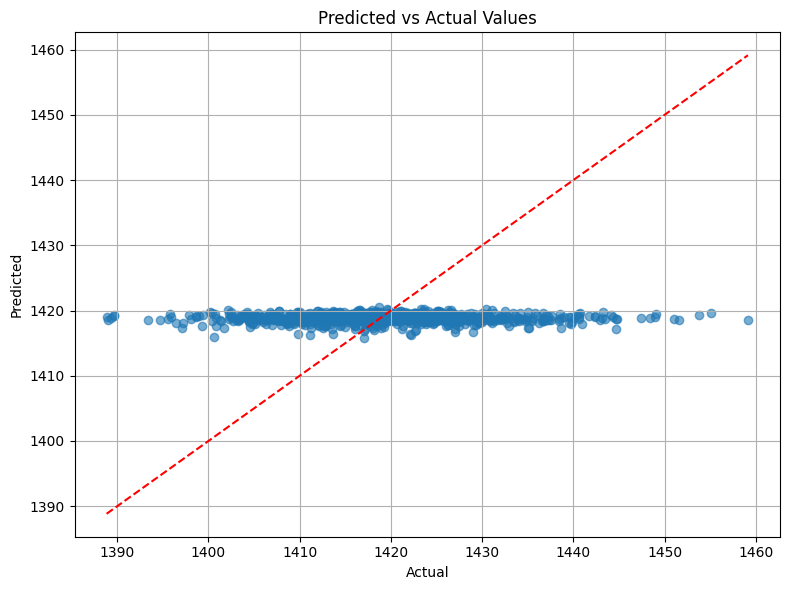

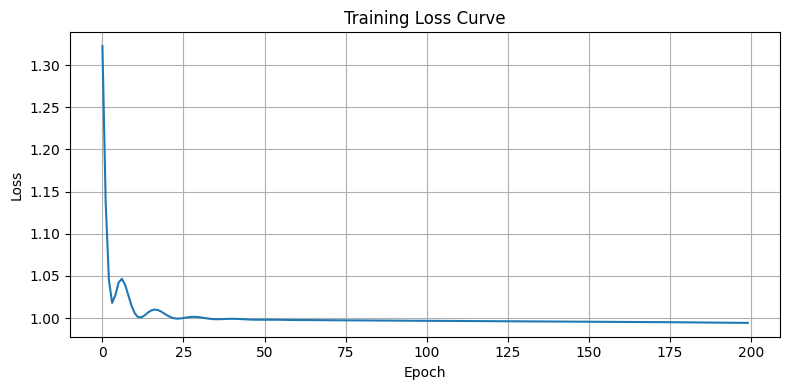

In [82]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

# 4. Define the neural network
class RegressionNN(nn.Module):
    def __init__(self):
        super(RegressionNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(4, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.net(x)

model = RegressionNN()

# 5. Training setup
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 200

# 6. Training loop
losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# 7. Evaluation
model.eval()
with torch.no_grad():
    y_pred_scaled = model(X_test_tensor).numpy()
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# 8. Plot predictions vs ground truth
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. (Optional) Plot training loss curve
plt.figure(figsize=(8,4))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
from torch.utils.data import DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def collate_batch(batch):
    label_list, text_list, offsets, c = [], [], [0], []
    for t in batch:
        _label, _text = int(t[1]), str(t[0])
        c.append(t[2])
        label_list.append(_label)
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        text_list.append(processed_text)
        offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)

    return label_list.to(device), text_list.to(device), offsets.to(device), torch.tensor(c).to(device)

In [ ]:
from sklearn.neighbors import NearestNeighbors

def mle(X: np.ndarray, k: int = 5, distances: bool = False):
    nn = NearestNeighbors(n_neighbors=k, metric='precomputed' if distances else 'minkowski').fit(X)
    dist, _ = nn.kneighbors()

    return (k - 1) / (np.log(np.expand_dims(dist[:, -1], 1) / dist).sum(axis=-1) + 1e-6)

In [91]:
import torch.nn.functional as F

def train(dataloader):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    for idx, (label, text, offsets, c) in enumerate(dataloader):
        optimizer.zero_grad()
        predited_label = model(text, offsets)

        weight = (c.max() - c)/(c.max() - c.min())
        weight /= weight.sum()
        loss = F.cross_entropy(predited_label, label, reduction='none') * weight

        loss.sum().backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predited_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
                                              total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()


def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets, c) in enumerate(dataloader):
            predited_label = model(text, offsets)
            total_acc += (predited_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc/total_count

In [88]:
from torch import nn

class TextClassificationModel(nn.Module):

    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=False)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

In [89]:
num_class = 4
vocab_size = len(vocab)
emsize = 64

In [118]:
model = TextClassificationModel(vocab_size, emsize, num_class).to(device)

In [119]:
emb = []
with torch.no_grad():
  for i in subsample_ix:
    processed_text = torch.tensor(text_pipeline(train_dataset0.texts[i]), dtype=torch.int64).to(device)
    offsets = torch.tensor([0]).to(device)
    emb.append(model.embedding(processed_text, offsets).reshape(-1))
emb[0]

tensor([ 0.0185, -0.0194,  0.0363, -0.0314,  0.0347,  0.0096, -0.0506,  0.0192,
         0.0259,  0.0105, -0.0085, -0.0227, -0.0020, -0.0135, -0.0466,  0.0182,
         0.0004,  0.0109,  0.0024, -0.0052, -0.0049, -0.0231,  0.0546,  0.0018,
         0.0392, -0.0427, -0.0055, -0.0029, -0.0214,  0.0195,  0.0652,  0.0156,
        -0.0160,  0.0147,  0.0417, -0.0264, -0.0107,  0.0484, -0.0022, -0.0322,
         0.0061,  0.0175, -0.0083, -0.0124, -0.0157, -0.0511,  0.0336, -0.0262,
         0.0151,  0.0641,  0.0477, -0.0601,  0.0391,  0.0092,  0.0511, -0.0118,
         0.0749,  0.0035, -0.0246,  0.0803,  0.0435,  0.0147, -0.0304,  0.0623])

In [99]:
import time

# Hyperparameters
EPOCHS = 5 # epoch
LR = 5  # learning rate
BATCH_SIZE = 64 # batch size for training

optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None

train_dataloader = DataLoader(train_dataset0, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader)
    accu_val = evaluate(valid_dataloader)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)

| epoch   1 |   500/ 2094 batches | accuracy    0.259
| epoch   1 |  1000/ 2094 batches | accuracy    0.284
| epoch   1 |  1500/ 2094 batches | accuracy    0.299
| epoch   1 |  2000/ 2094 batches | accuracy    0.304
-----------------------------------------------------------
| end of epoch   1 | time: 77.12s | valid accuracy    0.770 
-----------------------------------------------------------
| epoch   2 |   500/ 2094 batches | accuracy    0.313
| epoch   2 |  1000/ 2094 batches | accuracy    0.318
| epoch   2 |  1500/ 2094 batches | accuracy    0.320
| epoch   2 |  2000/ 2094 batches | accuracy    0.316
-----------------------------------------------------------
| end of epoch   2 | time: 73.40s | valid accuracy    0.828 
-----------------------------------------------------------
| epoch   3 |   500/ 2094 batches | accuracy    0.327
| epoch   3 |  1000/ 2094 batches | accuracy    0.325
| epoch   3 |  1500/ 2094 batches | accuracy    0.323
| epoch   3 |  2000/ 2094 batches | accuracy

In [100]:
emb_after = []
with torch.no_grad():
  for i in subsample_ix:
    processed_text = torch.tensor(text_pipeline(train_dataset0.texts[i]), dtype=torch.int64).to(device)
    offsets = torch.tensor([0]).to(device)
    emb_after.append(model.embedding(processed_text, offsets).reshape(-1))
emb_after[0]

tensor([ 0.0073, -0.0096, -0.0115,  0.0123, -0.0019, -0.0143,  0.0296,  0.0128,
        -0.0277, -0.0249,  0.0052, -0.0170,  0.0447, -0.0234, -0.0338, -0.0225,
        -0.0107,  0.0127, -0.0262, -0.0180, -0.0153,  0.0346,  0.0360, -0.0053,
        -0.0137,  0.0115, -0.0425,  0.0388, -0.0526,  0.0092,  0.0226, -0.0278,
         0.0117, -0.0501, -0.0604,  0.0009,  0.0083,  0.0078, -0.0022,  0.0292,
         0.0004,  0.0117,  0.0295,  0.0260,  0.0489, -0.0373,  0.0595,  0.0391,
         0.0407,  0.0005,  0.0499,  0.0045,  0.0079,  0.0043, -0.0168,  0.0105,
         0.0065,  0.0210,  0.0038, -0.0290, -0.0478, -0.0071,  0.0394, -0.0234])

In [120]:
emb_ix, emb = np.unique(torch.stack(emb).numpy(force=True), axis=0, return_index=True)

In [124]:
emb_ix, emb = emb, emb_ix

<Axes: >

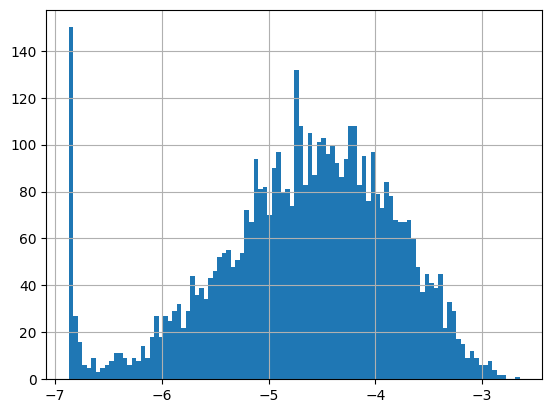

In [125]:
from scipy.spatial.distance import pdist, squareform

D = squareform(pdist(emb))
# Fit density estimator using distances
bandwidth = 0.08
kde_fn = metric_kde_from_distances(bandwidth)

scores = []
for i in range(D.shape[0]):
  # Now estimate density at a new point (e.g., x = 1.5)
  d_new = D[i].reshape(1, -1)
  density_at_x_new = np.log(kde_fn(d_new))
  scores.append(density_at_x_new)

pd.Series(scores).hist(bins=100)

In [126]:
from scipy.stats import kendalltau, pearsonr, linregress, spearmanr
for C in (kendalltau, pearsonr, linregress, spearmanr):
  print(C(scores, train_dataset0.complexities[subsample_ix[emb_ix]]))

SignificanceResult(statistic=np.float64(0.15641761711185945), pvalue=np.float64(1.6625472619788392e-59))
PearsonRResult(statistic=np.float64(0.27348500487285987), pvalue=np.float64(2.7741069141278655e-83))
LinregressResult(slope=np.float64(3.1326619920156378), intercept=np.float64(1433.50304673676), rvalue=np.float64(0.27348500487285987), pvalue=np.float64(2.7741069141278483e-83), stderr=np.float64(0.1588809541697632), intercept_stderr=np.float64(0.7555044902268886))
SignificanceResult(statistic=np.float64(0.23076101158073536), pvalue=np.float64(3.574690528575669e-59))


<Axes: >

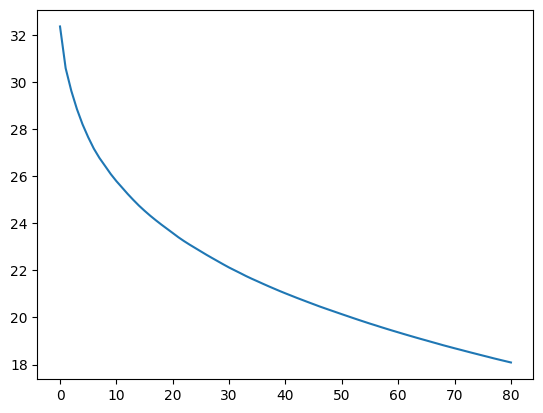

In [127]:
d = []
for x in range(10, 820, 10):
  d.append(mle_aggregate(mle(D, x, True)))
pd.Series(d).plot()

In [130]:
res = [list() for i in range(4)]
for x in range(10, 820, 10):
  dim = mle(D, x, True)
  for i, C in enumerate((kendalltau, pearsonr, spearmanr)):
    res[i].append(C(dim, train_dataset0.complexities[subsample_ix[emb_ix]]).statistic)
  res[-1].append(linregress(dim, train_dataset0.complexities[subsample_ix[emb_ix]]).rvalue)

<Axes: >

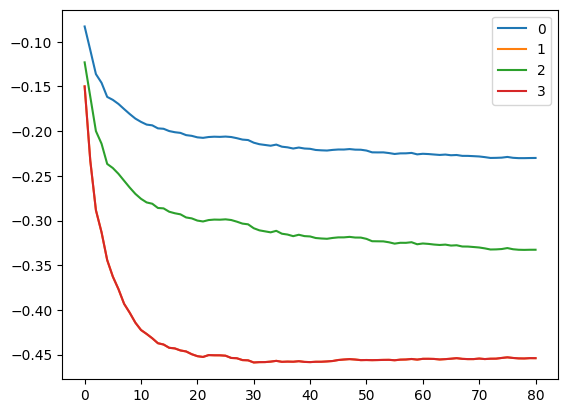

In [131]:
pd.DataFrame(res).T.plot()

In [132]:
corr(D)

np.float64(4.828832373271358)

In [133]:
two_nn(D, True)

np.float64(36.18318205603848)

<Axes: >

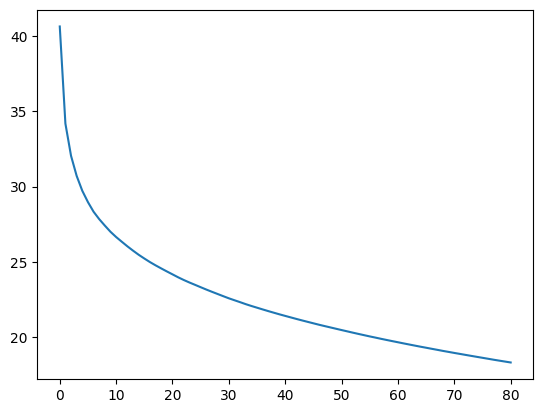

In [134]:
d = []
for x in range(10, 820, 10):
  d.append(mm(D, x, True).mean())
pd.Series(d).plot()

<Axes: >

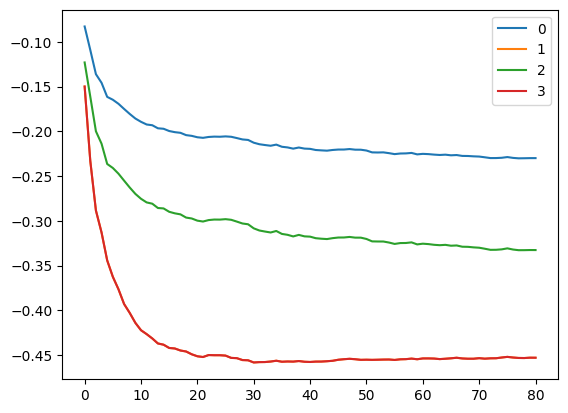

In [138]:
res = [list() for i in range(4)]
for x in range(10, 820, 10):
  dim = mm(D, x, True)
  for i, C in enumerate((kendalltau, pearsonr, spearmanr)):
    res[i].append(C(dim, train_dataset0.complexities[subsample_ix[emb_ix]]).statistic)
  res[-1].append(linregress(dim, train_dataset0.complexities[subsample_ix[emb_ix]]).rvalue)
pd.DataFrame(res).T.plot()

<Axes: >

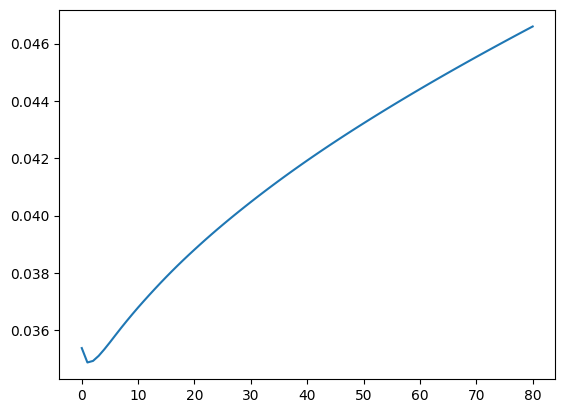

In [139]:
d = []
for x in range(10, 820, 10):
  d.append(ols(D, x, True))
pd.Series(d).plot()

In [140]:
emb_after, emb_ix_after = np.unique(torch.stack(emb_after).numpy(force=True), axis=0, return_index=True)

<Axes: >

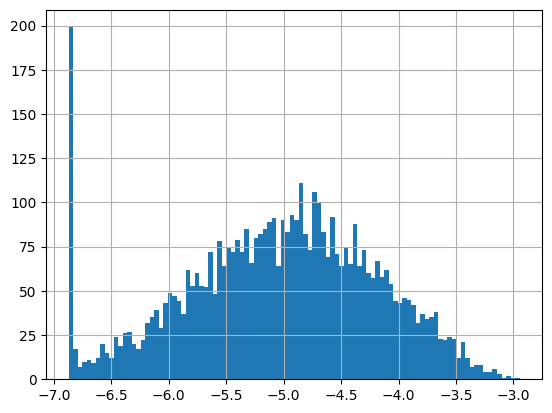

In [141]:
from scipy.spatial.distance import pdist, squareform

R = squareform(pdist(emb_after))
# Fit density estimator using distances
bandwidth = 0.08
kde_fn = metric_kde_from_distances(bandwidth)

scores = []
for i in range(R.shape[0]):
  # Now estimate density at a new point (e.g., x = 1.5)
  d_new = R[i].reshape(1, -1)
  density_at_x_new = np.log(kde_fn(d_new))
  scores.append(density_at_x_new)

pd.Series(scores).hist(bins=100)

In [142]:
from scipy.stats import kendalltau, pearsonr, linregress, spearmanr
for C in (kendalltau, pearsonr, linregress, spearmanr):
  print(C(scores, train_dataset0.complexities[subsample_ix[emb_ix_after]]))

SignificanceResult(statistic=np.float64(0.14803004721940494), pvalue=np.float64(1.7478466386502407e-53))
PearsonRResult(statistic=np.float64(0.2521082246725576), pvalue=np.float64(1.2110085466047608e-70))
LinregressResult(slope=np.float64(2.9314645057328104), intercept=np.float64(1433.6235504527174), rvalue=np.float64(0.2521082246725577), pvalue=np.float64(1.2110085466045696e-70), stderr=np.float64(0.16225965572848547), intercept_stderr=np.float64(0.8290934845865431))
SignificanceResult(statistic=np.float64(0.21867726249201375), pvalue=np.float64(3.5444984152803645e-53))


<Axes: >

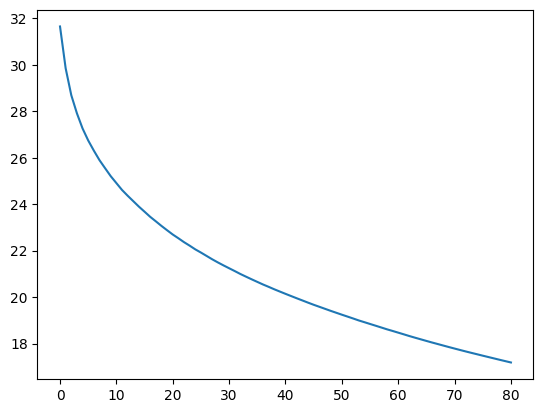

In [143]:
d = []
for x in range(10, 820, 10):
  d.append(mle_aggregate(mle(R, x, True)))
pd.Series(d).plot()

In [144]:
res = [list() for i in range(4)]
for x in range(10, 820, 10):
  dim = mle(R, x, True)
  for i, C in enumerate((kendalltau, pearsonr, spearmanr)):
    res[i].append(C(dim, train_dataset0.complexities[subsample_ix[emb_ix_after]]).statistic)
  res[-1].append(linregress(dim, train_dataset0.complexities[subsample_ix[emb_ix_after]]).rvalue)

<Axes: >

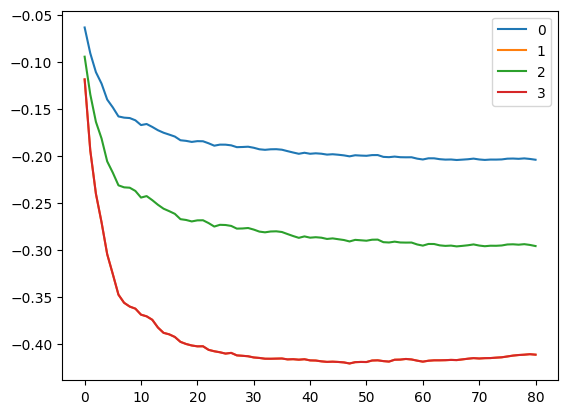

In [145]:
pd.DataFrame(res).T.plot()

In [149]:
corr(R)

np.float64(4.133609986933319)

In [150]:
two_nn(R, True)

np.float64(35.78171323464626)

<Axes: >

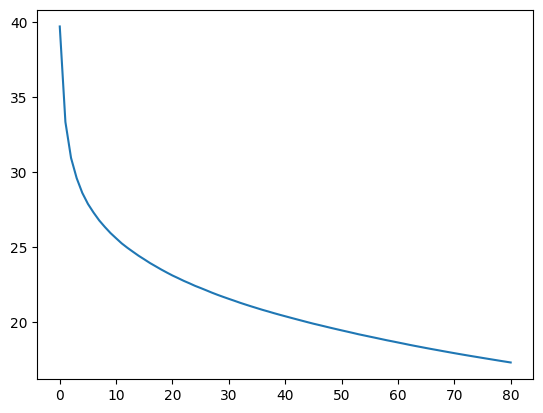

In [151]:
d = []
for x in range(10, 820, 10):
  d.append(mm(R, x, True).mean())
pd.Series(d).plot()

<Axes: >

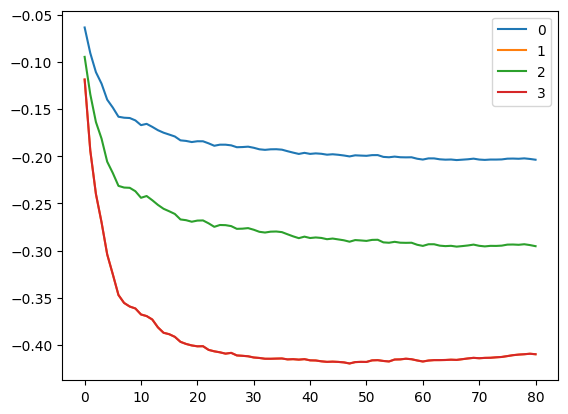

In [152]:
res = [list() for i in range(4)]
for x in range(10, 820, 10):
  dim = mm(R, x, True)
  for i, C in enumerate((kendalltau, pearsonr, spearmanr)):
    res[i].append(C(dim, train_dataset0.complexities[subsample_ix[emb_ix_after]]).statistic)
  res[-1].append(linregress(dim, train_dataset0.complexities[subsample_ix[emb_ix_after]]).rvalue)
pd.DataFrame(res).T.plot()

<Axes: >

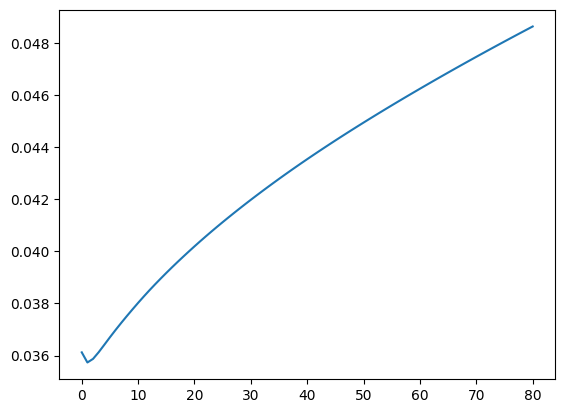

In [153]:
d = []
for x in range(10, 820, 10):
  d.append(ols(R, x, True))
pd.Series(d).plot()

In [154]:
X = np.stack([
    mle(R, 100, True),
    mm(R, 100, True),
    mle(R, 100, True),
    scores
], axis=-1)
y = train_dataset0.complexities[subsample_ix[emb_ix_after]]

In [155]:
X.shape

(4811, 4)

In [156]:
# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Define models to compare
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

# 5. Train, predict, and assess models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })

# 6. Show results
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print(results_df)

              Model        MAE         MSE       RMSE        R²
5  GradientBoosting   6.568681   73.736150   8.586976  0.238361
6               SVR   6.613383   75.333771   8.679503  0.221859
0  LinearRegression   6.923667   80.262199   8.958917  0.170952
1             Ridge   6.933860   80.550647   8.975001  0.167972
4      RandomForest   6.960956   82.683447   9.093044  0.145942
2             Lasso   6.956413   83.213680   9.122153  0.140465
7               KNN   7.030638   83.664218   9.146815  0.135812
3      DecisionTree  10.016306  164.639945  12.831210 -0.700607


In [157]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring='r2', cv=5)
    print(f"{name} Average R²: {np.mean(scores):.3f}")

LinearRegression Average R²: 0.124
Ridge Average R²: 0.124
Lasso Average R²: 0.114
DecisionTree Average R²: -0.656
RandomForest Average R²: 0.082
GradientBoosting Average R²: 0.174
SVR Average R²: 0.128
KNN Average R²: 0.048


RMSE: 8.4750
R²: 0.2581


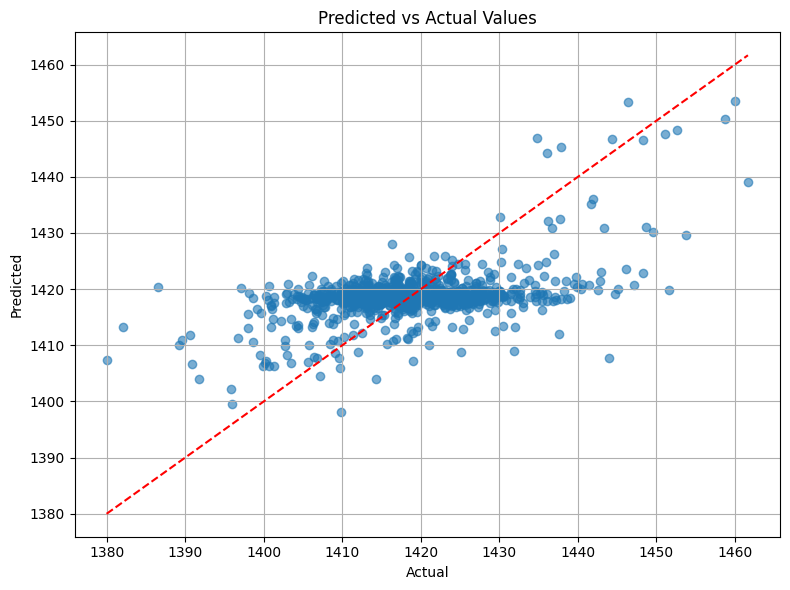

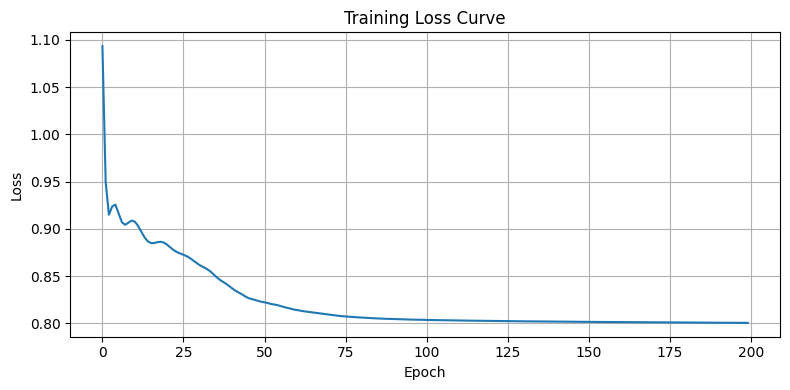

In [161]:
# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

# 4. Define the neural network
class RegressionNN(nn.Module):
    def __init__(self):
        super(RegressionNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(4, 32),
            nn.Tanh(),
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.net(x)

model = RegressionNN()

# 5. Training setup
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 200

# 6. Training loop
losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# 7. Evaluation
model.eval()
with torch.no_grad():
    y_pred_scaled = model(X_test_tensor).numpy()
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# 8. Plot predictions vs ground truth
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. (Optional) Plot training loss curve
plt.figure(figsize=(8,4))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.tight_layout()
plt.show()

In [162]:
from torch.utils.data import DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def collate_batch(batch):
    label_list, text_list, offsets, c = [], [], [0], []
    for t in batch:
        _label, _text = int(t[1]), str(t[0])
        c.append(t[2])
        label_list.append(_label)
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        text_list.append(processed_text)
        offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)

    return label_list.to(device), text_list.to(device), offsets.to(device), torch.tensor(c).to(device)

In [172]:
import torch.nn.functional as F

def train(dataloader):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    for idx, (label, text, offsets, c) in enumerate(dataloader):
        optimizer.zero_grad()

        embedded = model.embedding(text, offsets)
        predited_label = model.fc(embedded)

        dim = torch.tensor(mle(squareform(pdist((embedded + torch.randn_like(embedded) / 8).numpy(force=True))), len(label) // 2))

        weight = (dim - dim.min())/(dim.max() - dim.min())
        weight /= weight.sum()
        loss = F.cross_entropy(predited_label, label, reduction='none') * weight

        loss.sum().backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predited_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
                                              total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()


def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets, c) in enumerate(dataloader):
            predited_label = model(text, offsets)
            total_acc += (predited_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc/total_count

In [164]:
from torch import nn

class TextClassificationModel(nn.Module):

    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=False)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

In [165]:
num_class = 4
vocab_size = len(vocab)
emsize = 64

In [166]:
model = TextClassificationModel(vocab_size, emsize, num_class).to(device)

In [173]:
import time

# Hyperparameters
EPOCHS = 5 # epoch
LR = 5  # learning rate
BATCH_SIZE = 64 # batch size for training

optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None

train_dataloader = DataLoader(train_dataset0, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader)
    accu_val = evaluate(valid_dataloader)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)

| epoch   1 |   500/ 2094 batches | accuracy    0.265
| epoch   1 |  1000/ 2094 batches | accuracy    0.283
| epoch   1 |  1500/ 2094 batches | accuracy    0.293
| epoch   1 |  2000/ 2094 batches | accuracy    0.299
-----------------------------------------------------------
| end of epoch   1 | time: 82.54s | valid accuracy    0.705 
-----------------------------------------------------------
| epoch   2 |   500/ 2094 batches | accuracy    0.314
| epoch   2 |  1000/ 2094 batches | accuracy    0.315
| epoch   2 |  1500/ 2094 batches | accuracy    0.318
| epoch   2 |  2000/ 2094 batches | accuracy    0.314
-----------------------------------------------------------
| end of epoch   2 | time: 80.08s | valid accuracy    0.792 
-----------------------------------------------------------
| epoch   3 |   500/ 2094 batches | accuracy    0.323
| epoch   3 |  1000/ 2094 batches | accuracy    0.319
| epoch   3 |  1500/ 2094 batches | accuracy    0.323
| epoch   3 |  2000/ 2094 batches | accuracy